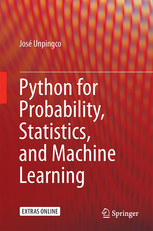

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

# Projection Methods

The concept of projection is key to developing an intuition about conditional
probability.  We already have a natural intuition of projection from looking at
the shadows of objects on a sunny day. As we will see, this simple idea
consolidates many abstract ideas in optimization and mathematics.  Consider
[Figure](#fig:probability_001) where we want to find a point along the blue
line (namely, $\mathbf{x}$) that is closest to the black square (namely,
$\mathbf{y}$). In other words, we want to inflate the gray circle until it just
touches the black line. Recall that the circle boundary is the set of points for
which

$$
\sqrt{(\mathbf{y}-\mathbf{x})^T(\mathbf{y}-\mathbf{x})} =\|\mathbf{y}-\mathbf{x} \| = \epsilon
$$

 for some value of $\epsilon$. So we want a point $\mathbf{x}$ along
the line that satisfies this for the smallest $\epsilon$.  Then, that point
will be the closest point on the black line to the black square.
 It may be obvious from the diagram, but the closest point on the line
occurs where the line segment from the black square to the black line is
perpedicular to the line. At this point, the gray circle just touches the black
line. This is illustrated below in [Figure](#fig:probability_002).

<!-- dom:FIGURE: [fig-probability/probability_001.png, width=500 frac=0.90] Given the point $\mathbf{y}$ (black square) we want to find the $\mathbf{x}$ along the line that is closest to it. The gray circle is the locus of points within a fixed distance from $\mathbf{y}$. <div id="fig:probability_001"></div> -->
<!-- begin figure -->
<div id="fig:probability_001"></div>

<p>Given the point $\mathbf{y}$ (black square) we want to find the $\mathbf{x}$ along the line that is closest to it. The gray circle is the locus of points within a fixed distance from $\mathbf{y}$.</p>
<img src="fig-probability/probability_001.png" width=500>

<!-- end figure -->


**Programming Tip.**

[Figure](#fig:probability_001) uses the `matplotlib.patches` module.  This
module contains primitive shapes like circles, ellipses, and rectangles that
can be assembled into complex graphics.  As shown in the code in the IPython
Notebook corresponding to this chapter, after importing a particular shape, you
can apply that shape to an existing axis  using the `add_patch` method.  The
patches themselves can by styled using the usual formatting keywords like
`color` and `alpha`.



<!-- dom:FIGURE: [fig-probability/probability_002.png, width=500 frac=0.90] The closest point on the line occurs when the line is tangent to the circle. When this happens, the black line and the line (minimum distance) are perpedicular.  <div id="fig:probability_002"></div> -->
<!-- begin figure -->
<div id="fig:probability_002"></div>

<p>The closest point on the line occurs when the line is tangent to the circle. When this happens, the black line and the line (minimum distance) are perpedicular.</p>
<img src="fig-probability/probability_002.png" width=500>

<!-- end figure -->


 Now that we can see what's going on, we can construct the the solution
analytically. We can represent an arbitrary point along the black line as:

$$
\mathbf{x}=\alpha\mathbf{v}
$$

 where $\alpha\in\mathbb{R}$ slides the point up and down the line with

$$
\mathbf{v} = \left[ 1,1 \right]^T
$$

 Formally, $\mathbf{v}$ is the *subspace* onto which we want to
*project* $\mathbf{y}$. At the closest point, the vector between
$\mathbf{y}$ and $\mathbf{x}$ (the *error* vector above) is
perpedicular to the line. This means that

$$
(\mathbf{y}-\mathbf{x} )^T \mathbf{v} = 0
$$

 and by substituting and working out the terms, we obtain

$$
\alpha = \frac{\mathbf{y}^T\mathbf{v}}{ \|\mathbf{v} \|^2}
$$

 The *error* is the distance between $\alpha\mathbf{v}$ and $
\mathbf{y}$.  This is a right triangle, and we can use the Pythagorean
theorem to compute the squared length of this error as

$$
\epsilon^2 = \|( \mathbf{y}-\mathbf{x} )\|^2 = \|\mathbf{y}\|^2 - \alpha^2 \|\mathbf{v}\|^2 = \|\mathbf{y}\|^2 - \frac{\|\mathbf{y}^T\mathbf{v}\|^2}{\|\mathbf{v}\|^2}
$$

 where $ \|\mathbf{v}\|^2 = \mathbf{v}^T \mathbf{v} $. Note that since $\epsilon^2 \ge 0 $, this also shows that

$$
\| \mathbf{y}^T\mathbf{v}\| \le \|\mathbf{y}\|  \|\mathbf{v}\|
$$

 which is the famous and useful Cauchy-Schwarz inequality which we
will exploit later. Finally, we can assemble all of this into the *projection*
operator

$$
\mathbf{P}_v = \frac{1}{\|\mathbf{v}\|^2 } \mathbf{v v}^T
$$

 With this operator, we can take any $\mathbf{y}$ and find the closest
point on $\mathbf{v}$ by doing

$$
\mathbf{P}_v \mathbf{y} = \mathbf{v} \left( \frac{  \mathbf{v}^T \mathbf{y} }{\|\mathbf{v}\|^2} \right)
$$

 where we recognize the term in parenthesis as the $\alpha$ we
computed earlier.  It's called an *operator* because it takes a vector
($\mathbf{y}$) and produces another vector ($\alpha\mathbf{v}$). Thus,
projection unifies geometry and optimization.

## Weighted distance

We can easily extend this projection operator to cases where the measure of
distance between $\mathbf{y}$ and the subspace $\mathbf{v}$ is weighted. We can
accommodate these weighted distances by re-writing the projection operator as

<!-- Equation labels as ordinary links -->
<div id="eq:weightedProj"></div>

$$
\begin{equation}
\mathbf{P}_v=\mathbf{v}\frac{\mathbf{v}^T\mathbf{Q}^T}{\mathbf{v}^T\mathbf{Q v}}
\end{equation}
\label{eq:weightedProj} \tag{1}
$$

 where $\mathbf{Q}$ is positive definite matrix.  In the previous
case, we started with a point $\mathbf{y}$ and inflated a circle centered at
$\mathbf{y}$ until it just touched the line defined by $\mathbf{v}$ and this
point was closest point on the line to $\mathbf{y}$. The same thing happens
in the general case with a weighted distance except now we inflate an
ellipse, not a circle, until the ellipse touches the line.

<!-- # @@@CODE src-probability/Projection.py fromto: ^theta@^fig,ax -->

<!-- dom:FIGURE: [fig-probability/probability_003.png, width=500 frac=0.95] In the weighted case, the closest point on the line is tangent to the ellipse and is still perpedicular in the sense of the weighted distance. <div id="fig:probability_003"></div> -->
<!-- begin figure -->
<div id="fig:probability_003"></div>

<p>In the weighted case, the closest point on the line is tangent to the ellipse and is still perpedicular in the sense of the weighted distance.</p>
<img src="fig-probability/probability_003.png" width=500>

<!-- end figure -->


Note that the error vector ($\mathbf{y}-\alpha\mathbf{v}$) in [Figure](#fig:probability_003) is still perpendicular to the line (subspace
$\mathbf{v}$), but in the space of the weighted distance.  The difference
between the first projection (with the uniform circular distance) and the
general case (with the elliptical weighted distance) is the inner product
between the two cases.  For example, in the first case we have $\mathbf{y}^T
\mathbf{v}$ and in the weighted case we have $\mathbf{y}^T \mathbf{Q}^T
\mathbf{v}$. To move from the uniform circular case to the weighted ellipsoidal
case, all we had to do was change all of the vector inner products.  Before we
finish, we need a formal property  of projections:

$$
\mathbf{P}_v \mathbf{P}_v = \mathbf{P}_v
$$

 known as the *idempotent* property which basically says that once we
have projected onto a subspace, subsequent projections leave us in the
same subspace. You can verify this by computing Equation ref{eq:weightedProj}.

Thus, projection ties a minimization problem (closest point to a line) to an
algebraic concept (inner product). It turns out that these same geometric ideas
from linear algebra [[strang2006linear]](#strang2006linear) can be translated to the conditional
expectation. How this works is the subject of our next  section.